# Big Mart Data Analysis

**Dataset Info:**
Data Set containing Bigmart data and showing four years of it growth

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt


**Load the data file **

In [2]:
mart_data= pd.read_csv('Big mart datas.csv')

Look at the top 5 records of data

In [3]:
mart_data.head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,PostalCode,City,...,ProductID,Category,SubCategory,Product,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority
0,40098,CA-2014-AB10015140-41954,11-11-2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,02-05-2014,02-07-2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","3,709.40",9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","5,175.17",9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","2,892.51",5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11-05-2014,11-06-2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","2,832.96",8,0.0,311.52,903.04,Critical


Check the various attributes of data like shape (rows and cols)

In [4]:
mart_data.shape

(51290, 24)

Showing total present columns

In [5]:
mart_data.columns.values

array(['RowID', 'OrderID', 'OrderDate', 'ShipDate', 'ShipMode',
       'CustomerID', 'CustomerName', 'Segment', 'PostalCode', 'City',
       'State', 'Country', 'Region', 'Market', 'ProductID', 'Category',
       'SubCategory', 'Product', 'Sales', 'Quantity', 'Discount',
       'Profit', 'ShippingCost', 'OrderPriority'], dtype=object)

In [6]:
# Checking the data types of all the columns
mart_data.dtypes

RowID              int64
OrderID           object
OrderDate         object
ShipDate          object
ShipMode          object
CustomerID        object
CustomerName      object
Segment           object
PostalCode       float64
City              object
State             object
Country           object
Region            object
Market            object
ProductID         object
Category          object
SubCategory       object
Product           object
Sales             object
Quantity           int64
Discount         float64
Profit            object
ShippingCost     float64
OrderPriority     object
dtype: object

**Here Our target variables is Segment & Category**

In [7]:
mart_data.Segment.value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

In [8]:
mart_data.Category.value_counts()

Office Supplies    31289
Technology         10141
Furniture           9860
Name: Category, dtype: int64

In [9]:
mart_data.SubCategory.value_counts()

Binders        6146
Storage        5049
Art            4864
Paper          3492
Chairs         3434
Phones         3357
Furnishings    3154
Accessories    3075
Labels         2601
Fasteners      2601
Bookcases      2411
Supplies       2407
Envelopes      2387
Copiers        2223
Appliances     1742
Machines       1486
Tables          861
Name: SubCategory, dtype: int64

In [10]:
mart_data.Market.value_counts()

Asia Pacific    14302
Europe          11729
USCA            10378
LATAM           10294
Africa           4587
Name: Market, dtype: int64

In [11]:
mart_data.Region.value_counts()

Western Europe       5883
Central America      5616
Oceania              3487
Western US           3203
Southeastern Asia    3129
South America        2988
Eastern US           2848
Southern Asia        2655
Western Asia         2440
Eastern Asia         2374
Central US           2323
Northern Europe      2204
Southern Europe      2113
Caribbean            1690
Southern US          1620
Eastern Europe       1529
Western Africa       1460
North Africa         1278
Eastern Africa        728
Central Africa        643
Southern Africa       478
Canada                384
Central Asia          217
Name: Region, dtype: int64

In [12]:
# Check the descriptive statistics of numeric variables
mart_data.describe()

,RowID,PostalCode,Quantity,Discount,ShippingCost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,3.476545,0.142908,26.478567
std,14806.29199,32063.693350,2.278766,0.212280,57.251373
min,1.00000,1040.000000,1.000000,0.000000,1.002000
25%,12823.25000,23223.000000,2.000000,0.000000,2.610000
50%,25645.50000,56430.500000,3.000000,0.000000,7.790000
75%,38467.75000,90008.000000,5.000000,0.200000,24.450000
max,51290.00000,99301.000000,14.000000,0.850000,933.570000


Here we got the Quantity 25%-50%-75% variation but this is not enough for analysis.

As we can see, Discount is being very less that will affect future sales.

Not getting much information from this will begin deep in it.

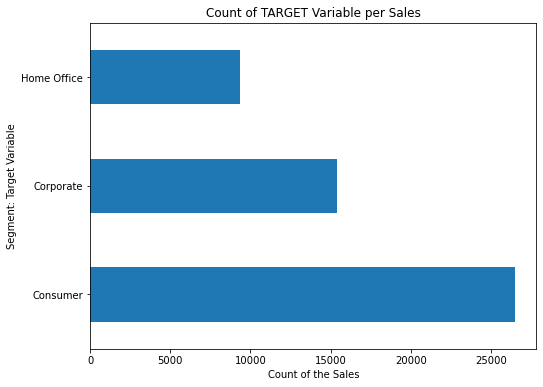

In [13]:
mart_data.Segment.value_counts().plot(kind = 'barh', figsize=(8, 6))
plt.xlabel("Count of the Sales")
plt.ylabel("Segment: Target Variable")
plt.title("Count of TARGET Variable per Sales");

Here we can, directly see that consumer segment is on top of sales.

Must create some decisions for home supplies to get it in top of sales.

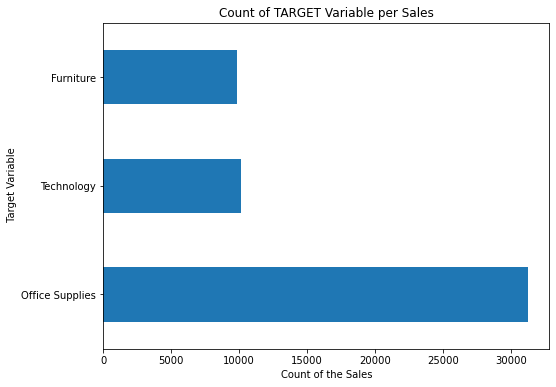

In [14]:
mart_data.Category.value_counts().plot(kind = 'barh', figsize=(8, 6))
plt.xlabel("Count of the Sales")
plt.ylabel(" Target Variable")
plt.title("Count of TARGET Variable per Sales");

Here, directly can see the office supplies is on top.

For office supplies i.e. corporate supplies must give some discount that will rise it tremendous.

Two category got stuck on same sales. Here must take some critical decisions to take it rise like office supplies.

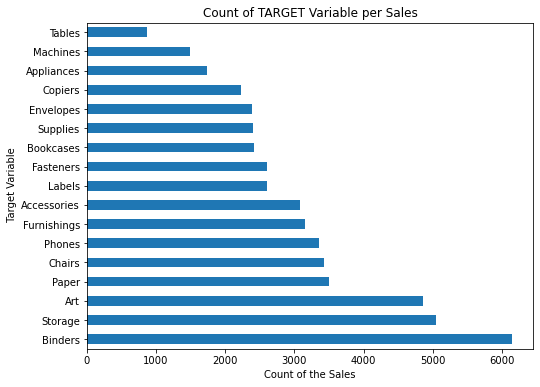

In [15]:
mart_data.SubCategory.value_counts().plot(kind = 'barh', figsize=(8, 6))
plt.xlabel("Count of the Sales")
plt.ylabel(" Target Variable")
plt.title("Count of TARGET Variable per Sales");

Art, Storage & Binders is on top of sales.

Must focus on Tables, Machines, Appliances & Copiers to take it sales up in future.

**Count of Segment**

In [16]:
mart_data['Segment'].value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

**Percentage of Segment**

In [17]:
100*mart_data['Segment'].value_counts()/len(mart_data['Segment'])

Consumer       51.702086
Corporate      30.081887
Home Office    18.216027
Name: Segment, dtype: float64

**Percentage of Category**

In [18]:
100*mart_data['Category'].value_counts()/len(mart_data['Category'])

Office Supplies    61.004094
Technology         19.771885
Furniture          19.224020
Name: Category, dtype: float64

* In Segment Half of market is consumed by Consumer but home Segment getting back.
* In Category Data is highly imbalanced, ratio = 61:19:19<br>
* So we analyse the data with other features while taking the target values separately to get some insights.

In [19]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
mart_data.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RowID          51290 non-null  int64  
 1   OrderID        51290 non-null  object 
 2   OrderDate      51290 non-null  object 
 3   ShipDate       51290 non-null  object 
 4   ShipMode       51290 non-null  object 
 5   CustomerID     51290 non-null  object 
 6   CustomerName   51290 non-null  object 
 7   Segment        51290 non-null  object 
 8   PostalCode     9994 non-null   float64
 9   City           51290 non-null  object 
 10  State          51290 non-null  object 
 11  Country        51290 non-null  object 
 12  Region         51290 non-null  object 
 13  Market         51290 non-null  object 
 14  ProductID      51290 non-null  object 
 15  Category       51290 non-null  object 
 16  SubCategory    51290 non-null  object 
 17  Product        51290 non-null  object 
 18  Sales 

In [20]:
mart_data.isnull().sum()

RowID                0
OrderID              0
OrderDate            0
ShipDate             0
ShipMode             0
CustomerID           0
CustomerName         0
Segment              0
PostalCode       41296
City                 0
State                0
Country              0
Region               0
Market               0
ProductID            0
Category             0
SubCategory          0
Product              0
Sales                0
Quantity             0
Discount             0
Profit               0
ShippingCost         0
OrderPriority        0
dtype: int64

Here, can see null values postal codes. but not very important column for analsis.

In [21]:
mart_data.shape[0]

51290

C:\Users\sunny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


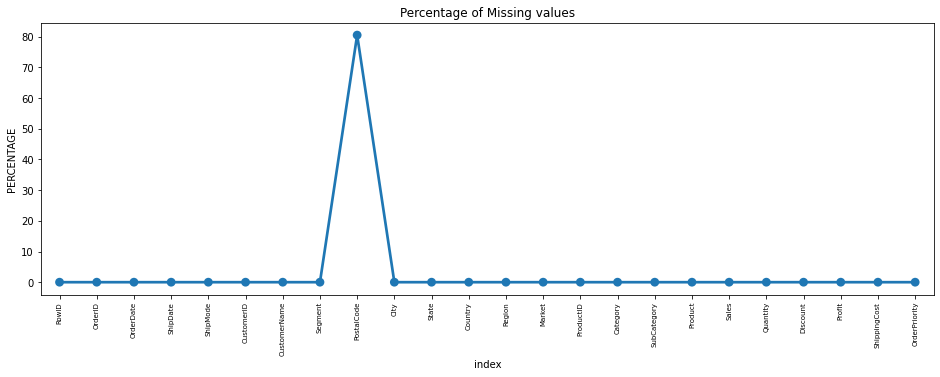

In [22]:
missing = pd.DataFrame((mart_data.isnull().sum())*100/mart_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

### Missing Data - Initial Intuition

* Here, we got some missing data.

General Thumb Rules:

* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

## Data Cleaning


**1.** Create a copy of base data for manupulation & processing

In [23]:
cmart_data =mart_data.copy()

In [24]:
cmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RowID          51290 non-null  int64  
 1   OrderID        51290 non-null  object 
 2   OrderDate      51290 non-null  object 
 3   ShipDate       51290 non-null  object 
 4   ShipMode       51290 non-null  object 
 5   CustomerID     51290 non-null  object 
 6   CustomerName   51290 non-null  object 
 7   Segment        51290 non-null  object 
 8   PostalCode     9994 non-null   float64
 9   City           51290 non-null  object 
 10  State          51290 non-null  object 
 11  Country        51290 non-null  object 
 12  Region         51290 non-null  object 
 13  Market         51290 non-null  object 
 14  ProductID      51290 non-null  object 
 15  Category       51290 non-null  object 
 16  SubCategory    51290 non-null  object 
 17  Product        51290 non-null  object 
 18  Sales 

**2.** Profit & Sales should be numeric amount. Let's convert it to numerical data type

In [25]:
cmart_data.Profit = pd.to_numeric(cmart_data.Profit, errors='coerce')


In [26]:
cmart_data.Sales = pd.to_numeric(cmart_data.Sales, errors='coerce')

In [27]:
cmart_data.isnull().sum()

RowID                0
OrderID              0
OrderDate            0
ShipDate             0
ShipMode             0
CustomerID           0
CustomerName         0
Segment              0
PostalCode       41296
City                 0
State                0
Country              0
Region               0
Market               0
ProductID            0
Category             0
SubCategory          0
Product              0
Sales             2626
Quantity             0
Discount             0
Profit             225
ShippingCost         0
OrderPriority        0
dtype: int64

**Got Some null values in new column like Sales & Profit.**

C:\Users\sunny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


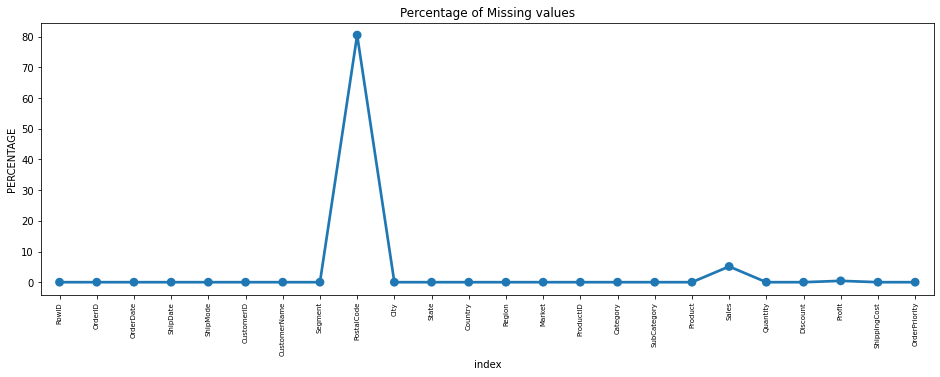

In [28]:
missing = pd.DataFrame((cmart_data.isnull().sum())*100/cmart_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [29]:
cmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RowID          51290 non-null  int64  
 1   OrderID        51290 non-null  object 
 2   OrderDate      51290 non-null  object 
 3   ShipDate       51290 non-null  object 
 4   ShipMode       51290 non-null  object 
 5   CustomerID     51290 non-null  object 
 6   CustomerName   51290 non-null  object 
 7   Segment        51290 non-null  object 
 8   PostalCode     9994 non-null   float64
 9   City           51290 non-null  object 
 10  State          51290 non-null  object 
 11  Country        51290 non-null  object 
 12  Region         51290 non-null  object 
 13  Market         51290 non-null  object 
 14  ProductID      51290 non-null  object 
 15  Category       51290 non-null  object 
 16  SubCategory    51290 non-null  object 
 17  Product        51290 non-null  object 
 18  Sales 

In [30]:
cmart_data.head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,PostalCode,City,...,ProductID,Category,SubCategory,Product,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority
0,40098,CA-2014-AB10015140-41954,11-11-2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,02-05-2014,02-07-2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",NaN,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",NaN,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",NaN,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11-05-2014,11-06-2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",NaN,8,0.0,311.52,903.04,Critical


**Null Values**

 As we can see there are 2626 missing values in Sales column. Let's check these records 

In [31]:
cmart_data.loc[cmart_data ['Sales'].isnull() == True]

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,PostalCode,City,...,ProductID,Category,SubCategory,Product,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority
1,26341,IN-2014-JR162107-41675,02-05-2014,02-07-2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",NaN,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",NaN,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",NaN,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11-05-2014,11-06-2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",NaN,8,0.0,311.52,903.04,Critical
5,22732,IN-2014-JM156557-41818,6/28/2014,07-01-2014,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,...,TEC-PH-5842,Technology,Phones,"Samsung Smart Phone, with Caller ID",NaN,5,0.1,763.28,897.35,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51152,32050,CA-2014-YC21895140-41737,04-08-2014,04-10-2014,First Class,YC-218951404,Yoseph Carroll,Corporate,94110.0,San Francisco,...,TEC-CO-4584,Technology,Copiers,Hewlett Packard 610 Color Digital Copier / Pri...,NaN,3,0.2,374.99,363.78,High
51191,32496,CA-2014-ZC21910140-41738,04-09-2014,4/13/2014,Standard Class,ZC-219101402,Zuschuss Carroll,Consumer,77041.0,Houston,...,OFF-BI-4340,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,NaN,4,0.8,NaN,169.49,High
51192,32107,CA-2012-ZC21910140-41194,10-12-2012,10/14/2012,First Class,ZC-219101404,Zuschuss Carroll,Consumer,98026.0,Edmonds,...,FUR-TA-3425,Furniture,Tables,"Bevis Round Bullnose 29"" High Table Top",NaN,5,0.0,311.65,146.92,High
51193,36485,CA-2013-ZC21910140-41530,9/13/2013,9/18/2013,Standard Class,ZC-219101402,Zuschuss Carroll,Consumer,47201.0,Columbus,...,FUR-CH-4670,Furniture,Chairs,Hon Multipurpose Stacking Arm Chairs,NaN,7,0.0,394.21,132.78,Medium


 As we can see there are 225 missing values in Profit column. Let's check these records 

In [32]:
cmart_data.loc[cmart_data ['Profit'].isnull() == True]

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,PostalCode,City,...,ProductID,Category,SubCategory,Product,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority
12,45794,SA-2012-MM7260110-41269,12/26/2012,12/28/2012,Second Class,MM-7260110,Magdelene Morse,Consumer,NaN,Jizan,...,TEC-PH-3807,Technology,Phones,"Cisco Smart Phone, with Caller ID",NaN,4,0.0,NaN,832.41,Critical
14,27704,IN-2014-PF1912027-41796,06-06-2014,06-08-2014,Second Class,PF-1912027,Peter Fuller,Consumer,NaN,Mudanjiang,...,OFF-AP-4959,Office Supplies,Appliances,"KitchenAid Microwave, White",NaN,12,0.0,NaN,804.54,Critical
17,12069,ES-2015-PJ1883564-42255,09-08-2015,9/14/2015,Standard Class,PJ-1883564,Patrick Jones,Corporate,NaN,Prato,...,OFF-AP-4743,Office Supplies,Appliances,"Hoover Stove, Red",NaN,14,0.0,NaN,778.32,Low
23,13528,ES-2014-LB16795139-41697,2/27/2014,03-01-2014,Second Class,LB-16795139,Laurel Beltran,Home Office,NaN,Edinburgh,...,OFF-AP-4960,Office Supplies,Appliances,"KitchenAid Refrigerator, Black",NaN,10,0.0,NaN,730.91,High
27,11645,ES-2012-EB1411048-40981,3/13/2012,3/16/2012,Second Class,EB-1411048,Eugene Barchas,Consumer,NaN,Leipzig,...,OFF-AP-4743,Office Supplies,Appliances,"Hoover Stove, Red",NaN,6,0.1,NaN,725.34,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49940,33920,CA-2015-TA21385140-42300,10/23/2015,10/25/2015,First Class,TA-213851406,Tom Ashbrook,Home Office,10024.0,New York City,...,TEC-CO-3691,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,NaN,4,0.2,NaN,45.98,High
49968,37923,CA-2012-TB21400140-41256,12/13/2012,12/20/2012,Standard Class,TB-214001406,Tom Boeckenhauer,Consumer,10024.0,New York City,...,TEC-MA-4768,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,NaN,4,0.0,NaN,499.55,Medium
50210,31324,US-2013-TB21520140-41534,9/17/2013,9/21/2013,Standard Class,TB-215201406,Tracy Blumstein,Consumer,19140.0,Philadelphia,...,FUR-BO-5685,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",NaN,7,0.5,NaN,242.60,Medium
50304,34225,US-2015-TH21550140-42297,10/20/2015,10/27/2015,Standard Class,TH-215501408,Tracy Hopkins,Home Office,27217.0,Burlington,...,OFF-BI-4340,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,NaN,4,0.7,NaN,127.10,Medium


**Remove columns not required for processing**

In [33]:
#drop column customerID and tenure
cmart_data.drop(columns= ['RowID','PostalCode'], axis=1, inplace=True)
cmart_data.head()

,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,Country,...,ProductID,Category,SubCategory,Product,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority
0,CA-2014-AB10015140-41954,11-11-2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,United States,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,IN-2014-JR162107-41675,02-05-2014,02-07-2014,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",NaN,9,0.1,-288.77,923.63,Critical
2,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,Australia,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",NaN,9,0.1,919.97,915.49,Medium
3,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,Germany,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",NaN,5,0.1,-96.54,910.16,Medium
4,SG-2014-RH9495111-41948,11-05-2014,11-06-2014,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,Senegal,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",NaN,8,0.0,311.52,903.04,Critical


In [34]:
cmart_data.shape

(51290, 22)

Now becomes 22 columns

**Missing Value Treatement**

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [35]:
cmart_data.shape

(51290, 22)

In [36]:
#Removing missing values 
cmart_data.dropna(how = 'any', inplace = True)

#.fillna(0)

In [37]:
cmart_data.shape

(48643, 22)

After missing value treatment\
**Row becomes 48643 & Columns is 22**

<AxesSubplot:>

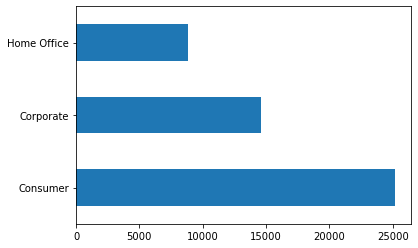

In [38]:
cmart_data.Segment.value_counts().plot(kind='barh')

In [39]:
cmart_data.isnull().sum()

OrderID          0
OrderDate        0
ShipDate         0
ShipMode         0
CustomerID       0
CustomerName     0
Segment          0
City             0
State            0
Country          0
Region           0
Market           0
ProductID        0
Category         0
SubCategory      0
Product          0
Sales            0
Quantity         0
Discount         0
Profit           0
ShippingCost     0
OrderPriority    0
dtype: int64

**No missing value is detected**

C:\Users\sunny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


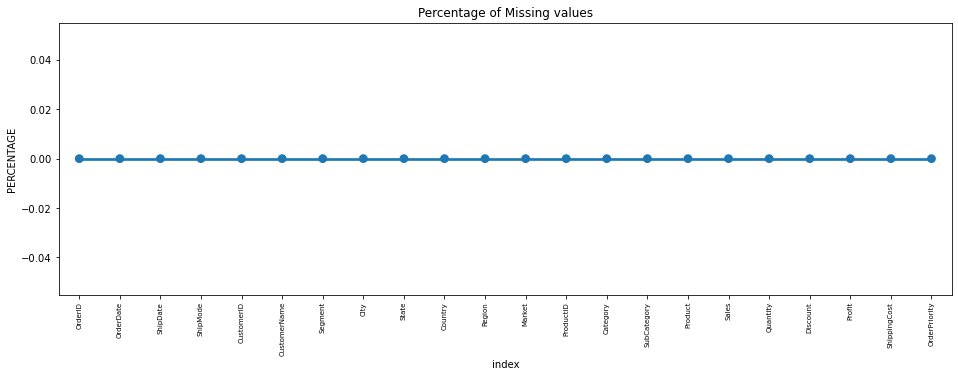

In [40]:
missing = pd.DataFrame((cmart_data.isnull().sum())*100/cmart_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

**correlation values lie between [-1,1]**

In [41]:
cmart_data.corr()

,Sales,Quantity,Discount,Profit,ShippingCost
Sales,1.000000,0.274230,-0.110186,0.284391,0.770173
Quantity,0.274230,1.000000,-0.010945,0.057090,0.203323
Discount,-0.110186,-0.010945,1.000000,-0.479268,-0.082169
Profit,0.284391,0.057090,-0.479268,1.000000,0.229252
ShippingCost,0.770173,0.203323,-0.082169,0.229252,1.000000


In [42]:
cmart_data.corr()['Sales'].sort_values(ascending = False)

Sales           1.000000
ShippingCost    0.770173
Profit          0.284391
Quantity        0.274230
Discount       -0.110186
Name: Sales, dtype: float64

<AxesSubplot:>

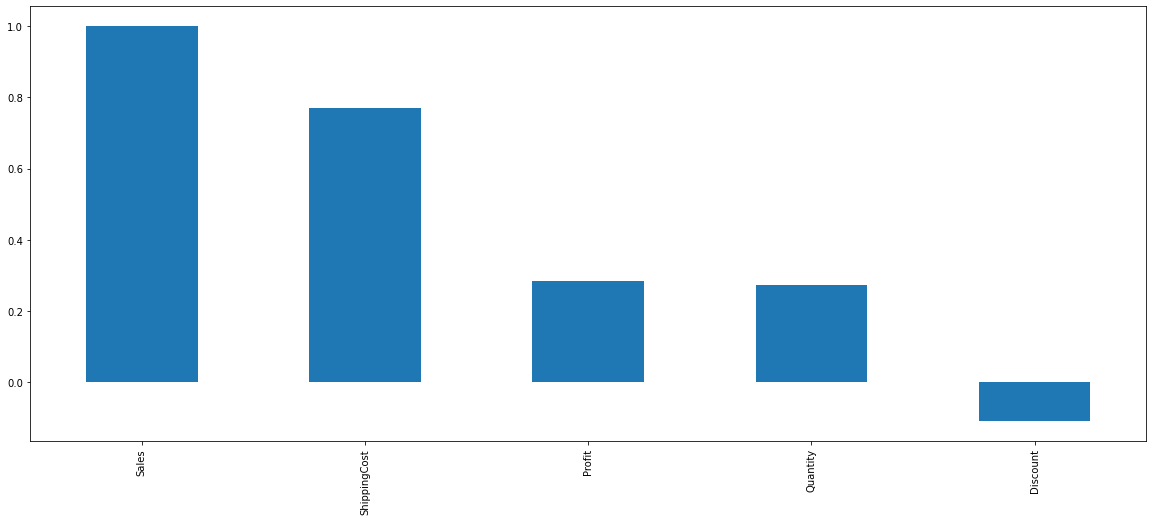

In [43]:
plt.figure(figsize=(20,8))
cmart_data.corr()['Sales'].sort_values(ascending = False).plot(kind='bar')

Here can see the discount in correlation with sales is very less that mean it is in negative zone.\
Must take good decision for it.

In [44]:
cmart_data.corr()['Quantity'].sort_values(ascending = False)

Quantity        1.000000
Sales           0.274230
ShippingCost    0.203323
Profit          0.057090
Discount       -0.010945
Name: Quantity, dtype: float64

<AxesSubplot:>

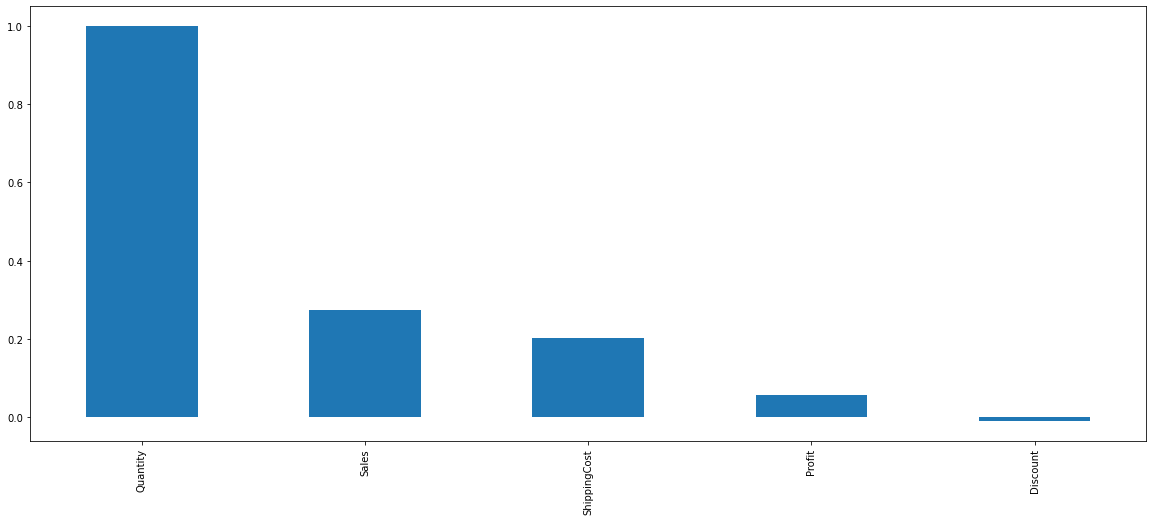

In [45]:
plt.figure(figsize=(20,8))
cmart_data.corr()['Quantity'].sort_values(ascending = False).plot(kind='bar')

Heat meap shows correlation\
Gives different trend in easiest way

<AxesSubplot:>

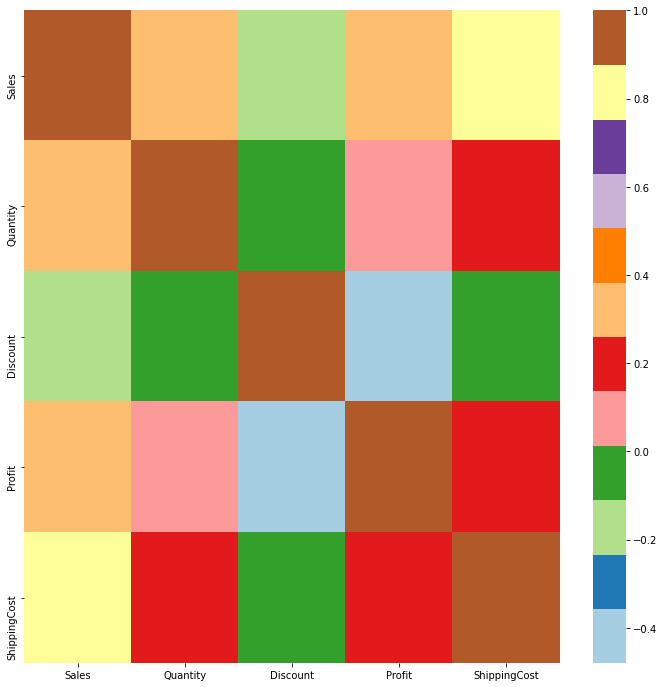

In [46]:
plt.figure(figsize=(12,12))
sns.heatmap(cmart_data.corr(), cmap="Paired")

## Data Exploration
Plot distibution of individual predictors

In [47]:
cmart_data.head(5)

,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,Country,...,ProductID,Category,SubCategory,Product,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority
0,CA-2014-AB10015140-41954,11-11-2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,United States,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
8,CA-2014-AB10015140-41954,11-11-2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,United States,...,FUR-BO-5957,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",341.96,2,0.0,54.71,25.27,High
9,CA-2012-AB10015140-40974,03-06-2012,03-07-2012,First Class,AB-100151404,Aaron Bergman,Consumer,Seattle,Washington,United States,...,FUR-CH-4421,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.71,1,0.2,5.48,11.13,High
10,CA-2012-AB10015140-40974,03-06-2012,03-07-2012,First Class,AB-100151404,Aaron Bergman,Consumer,Seattle,Washington,United States,...,OFF-AR-5309,Office Supplies,Art,Newell 330,17.94,3,0.0,4.66,4.29,High
16,CA-2012-AB10015140-40958,2/19/2012,2/25/2012,Standard Class,AB-100151402,Aaron Bergman,Consumer,Arlington,Texas,United States,...,OFF-ST-3078,Office Supplies,Storage,Akro Stacking Bins,12.62,2,0.2,-2.52,1.97,Low


**WE creating bins for those they exiced in values i.e. having big values**

**Here creating Bins for Quantity**\
Making new column Quantity_group

In [48]:
labels=["{0}-{1}".format(i,i+4) for i in range(1,17,5)]

cmart_data['Quantity_group']=pd.cut(cmart_data.Quantity,range(1,25,5), right=False, labels=labels)

In [49]:
cmart_data['Quantity_group'].value_counts()

1-5      41309
6-10      6859
11-15      475
16-20        0
Name: Quantity_group, dtype: int64

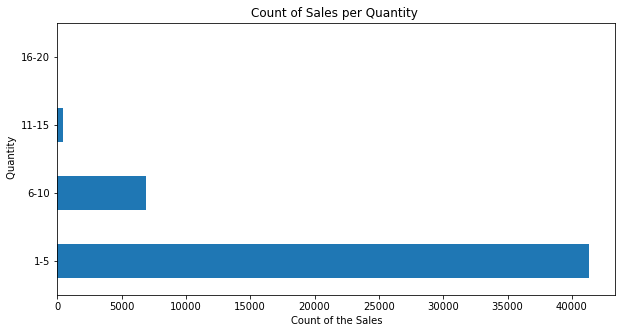

In [50]:
cmart_data.Quantity_group.value_counts().plot(kind = 'barh', figsize=(10, 5))
plt.xlabel("Count of the Sales")
plt.ylabel(" Quantity")
plt.title("Count of Sales per Quantity ");

Good to know people purchasing above 10 quantity some item.

Should give discount for purchase above 10 Quantity

**Only categorical data is used in analysis**\
Having numerical data droping those columns

# Univariate Analysis

**Comparing with First target i.e. Segment**

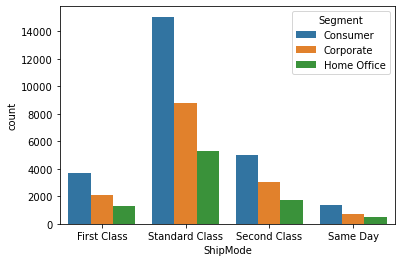

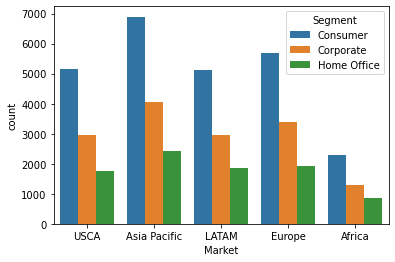

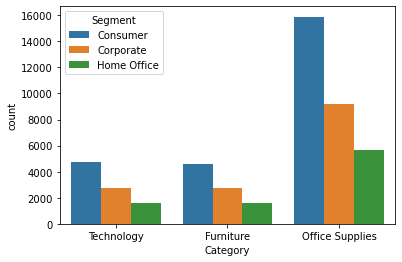

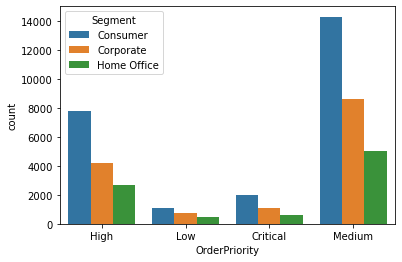

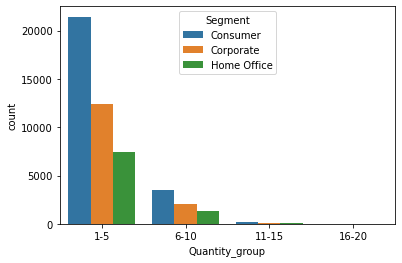

In [51]:
for i, predictor in enumerate(cmart_data.drop(columns=['OrderID','OrderDate','ShipDate','CustomerID','CustomerName','ProductID','Quantity','Discount','City','State','Country','Region','SubCategory','Product','Sales','Profit','ShippingCost','Segment'])):
    plt.figure(i)
    sns.countplot(data=cmart_data, x=predictor, hue='Segment')

**Comparing with second target i.e. Category**

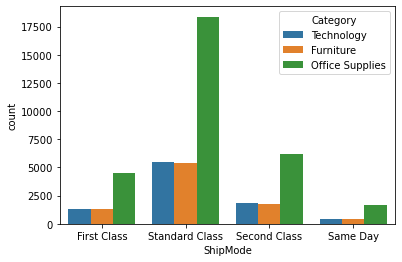

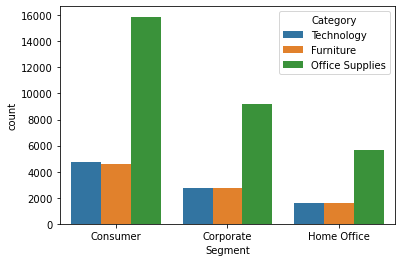

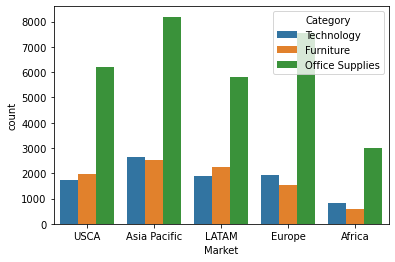

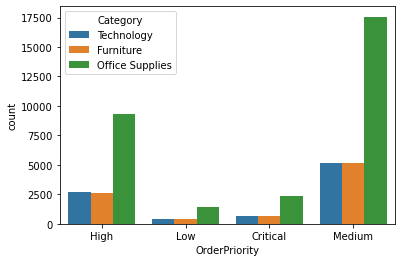

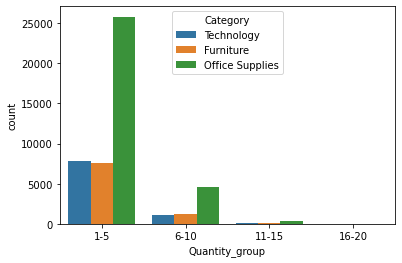

In [52]:
for i, predictor in enumerate(cmart_data.drop(columns=['OrderID','OrderDate','ShipDate','CustomerID','CustomerName','ProductID','Quantity','Discount','City','State','Country','Region','SubCategory','Product','Sales','Profit','ShippingCost','Category'])):
    plt.figure(i)
    sns.countplot(data=cmart_data, x=predictor, hue='Category')

**Here creating Bins for Sales**\
Making new column Sales_group

In [53]:
labels=["{0}-{1}".format(i,i+99) for i in range(1,1000,99)]

cmart_data['Sales_group']=pd.cut(cmart_data.Sales,range(1,1100,99), right=False, labels=labels)

In [54]:
cmart_data['Sales_group'].value_counts()

1-100       27832
100-199      8157
199-298      4188
298-397      2650
397-496      1632
496-595      1312
595-694       987
694-793       775
793-892       616
892-991       455
991-1090       31
Name: Sales_group, dtype: int64

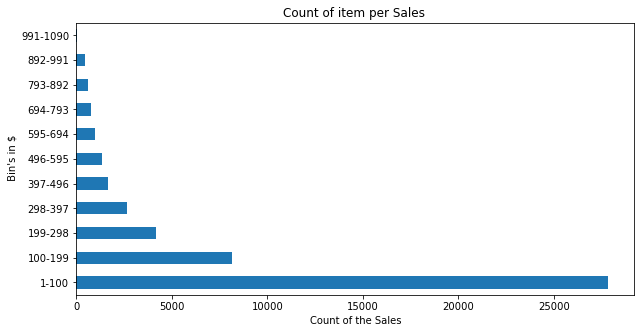

In [55]:
cmart_data.Sales_group.value_counts().plot(kind = 'barh', figsize=(10, 5))
plt.xlabel("Count of the Sales")
plt.ylabel(" Bin's in $")
plt.title("Count of item per Sales ");

Give some special offer for buy above 1000$\
Some extra Voucher will afftect sales.

**Insight**

Shipmode
* all segment is **rise** in standard class, specially consumer is on top
* Same day ship mode having **lower** sales in all segment. **Must be focus on home office segment delivery produtcs**.
* In shipmode, analyzing all segment got noticed that home office is **less** sales in all segment.

Market, 
* **Asia Pacific** market is on top of all market with consumer is on top.
* Here, must focus on **African** market that which decisions getting african market **down**.
* Also same as before **home office** segment is **down**.

Category, 
* Here office supplies is on **top**. In which **consumer category is top**.
* Here, Glad to notice that technology & furniture category is **same**.

Order Priority, 
* Medium order priority is  on **top**. In which same as previous consumer begins on **top**.
*Here, critical priority is on **down side**. Must focus because critical are those priority that must be deliver fast & secure.
* Same home office order priority getting **low**.

Quantiy bins, 
* Must give some special offers for buyers for buying above 10 quantity


**vs category**
* ship mode, **technology & furniture sales is same not rising with compared to office supplies**.
* More **improvement** is to be done on **first class** ship mode.

segment, 
* Same technology & furniture sales is same but office supplies is gaining top.

market, 
* In all market office supplies gaining **top**.
* Technology & Furniture sales is **same**.
* Marekt like europe & asia is **big market** for future sales so some serious decisions should be take.

order priority,
* Focus on technology category to be **fullfill** it requirement to deliver fast.
* Same as focus on **critical category**

Quantity bins,
In 16-20 quantity bin having **low** customers. Giving good offers will grab those customers
 

### Bivariate Analysis

In [56]:
new_df1_target1=cmart_data.loc[cmart_data["Segment"]=="Consumer"]
new_df1_target2=cmart_data.loc[cmart_data["Segment"]=="Corporate"]
new_df1_target3=cmart_data.loc[cmart_data["Segment"]=="Home Office"]

Here, **Segment** is been converting into three Target.\
i.e. target1=Consumer\
     target2=Corporate\
     target3=Home Office


In [57]:
len(new_df1_target1)

25174

In [58]:
len(new_df1_target2)

14626

In [59]:
len(new_df1_target3)

8843

In [60]:
cmart_data.Segment.value_counts()

Consumer       25174
Corporate      14626
Home Office     8843
Name: Segment, dtype: int64

In [61]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

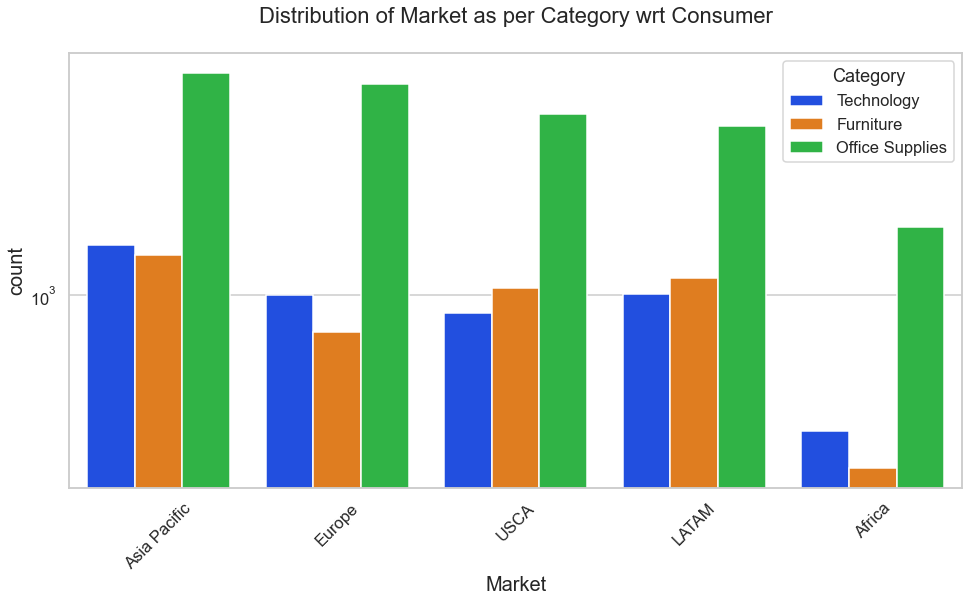

In [62]:
uniplot(new_df1_target1,col='Market',title='Distribution of Market as per Category wrt Consumer',hue='Category')

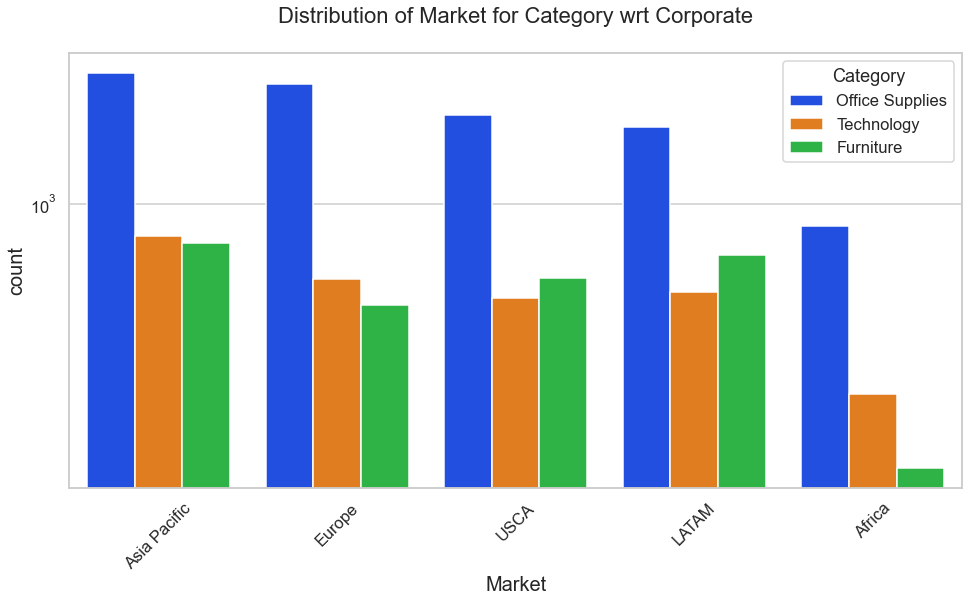

In [63]:
uniplot(new_df1_target2,col='Market',title='Distribution of Market for Category wrt Corporate',hue='Category')

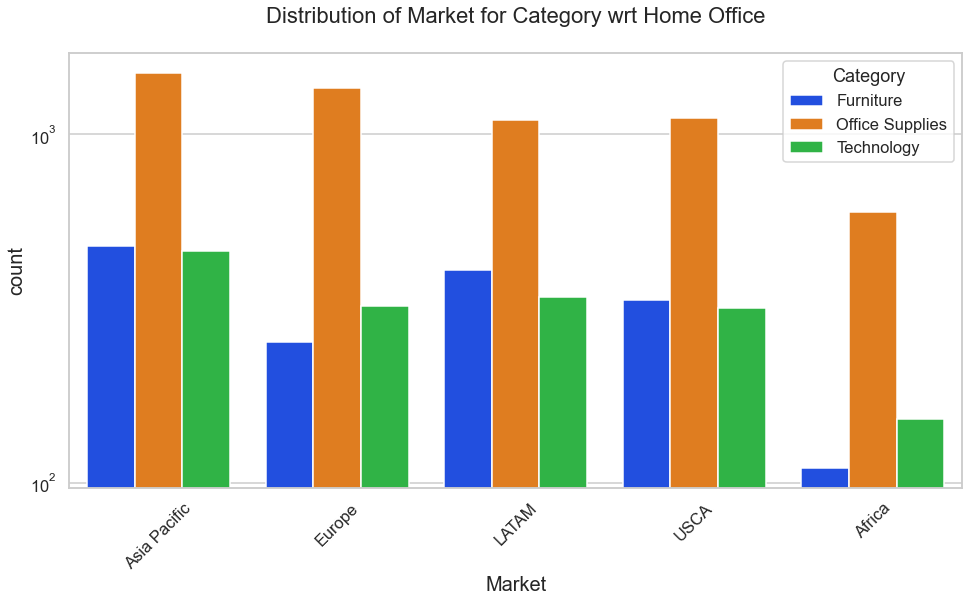

In [64]:
uniplot(new_df1_target3,col='Market',title='Distribution of Market for Category wrt Home Office',hue='Category')

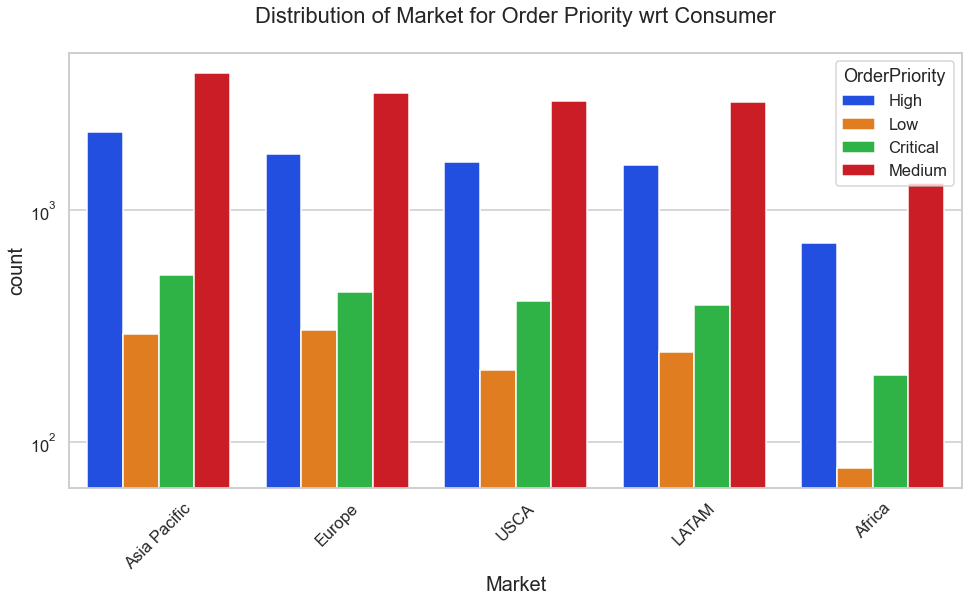

In [65]:
uniplot(new_df1_target1,col='Market',title='Distribution of Market for Order Priority wrt Consumer',hue='OrderPriority')

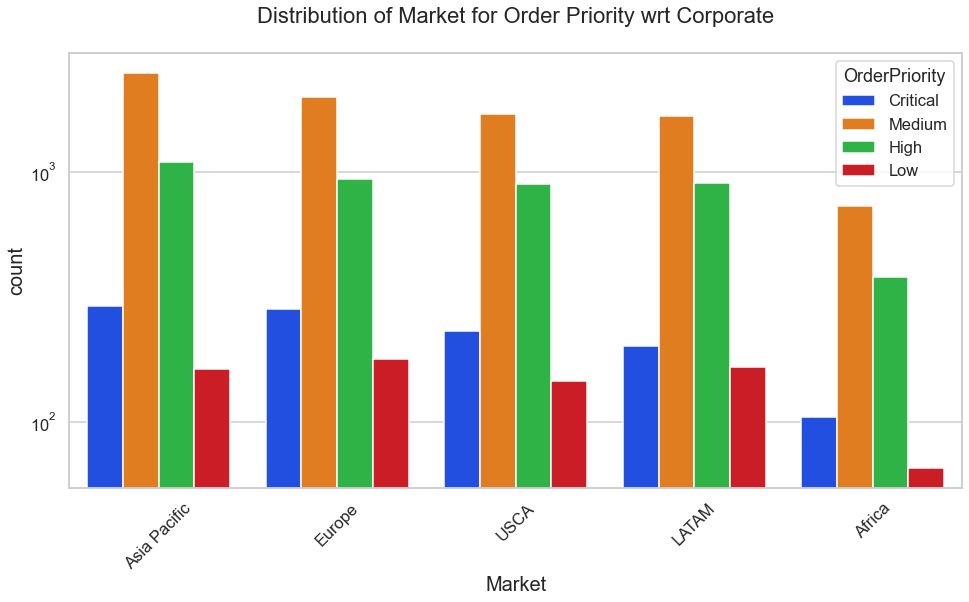

In [66]:
uniplot(new_df1_target2,col='Market',title='Distribution of Market for Order Priority wrt Corporate',hue='OrderPriority')

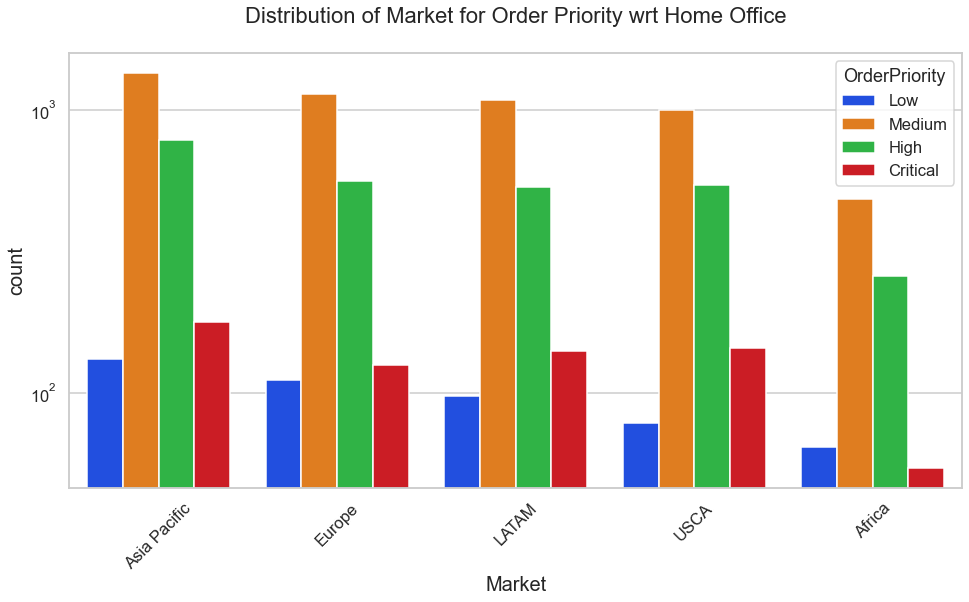

In [67]:
uniplot(new_df1_target3,col='Market',title='Distribution of Market for Order Priority wrt Home Office',hue='OrderPriority')

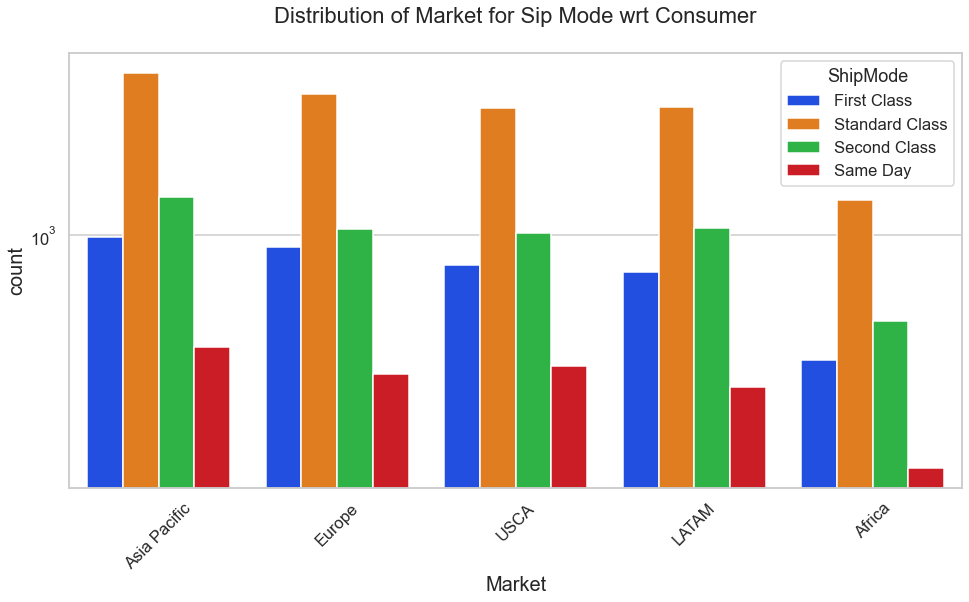

In [68]:
uniplot(new_df1_target1,col='Market',title='Distribution of Market for Sip Mode wrt Consumer',hue='ShipMode')

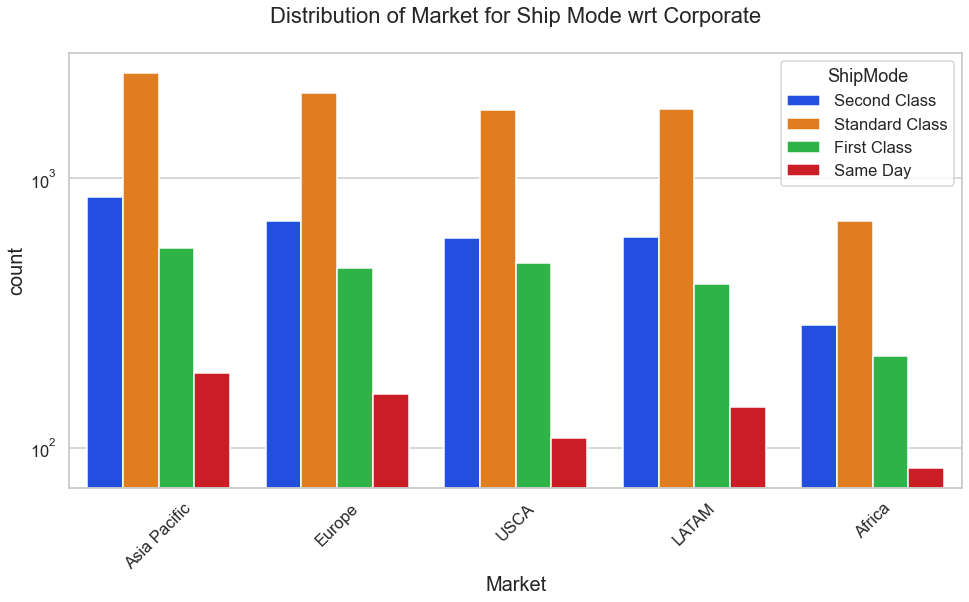

In [69]:
uniplot(new_df1_target2,col='Market',title='Distribution of Market for Ship Mode wrt Corporate',hue='ShipMode')

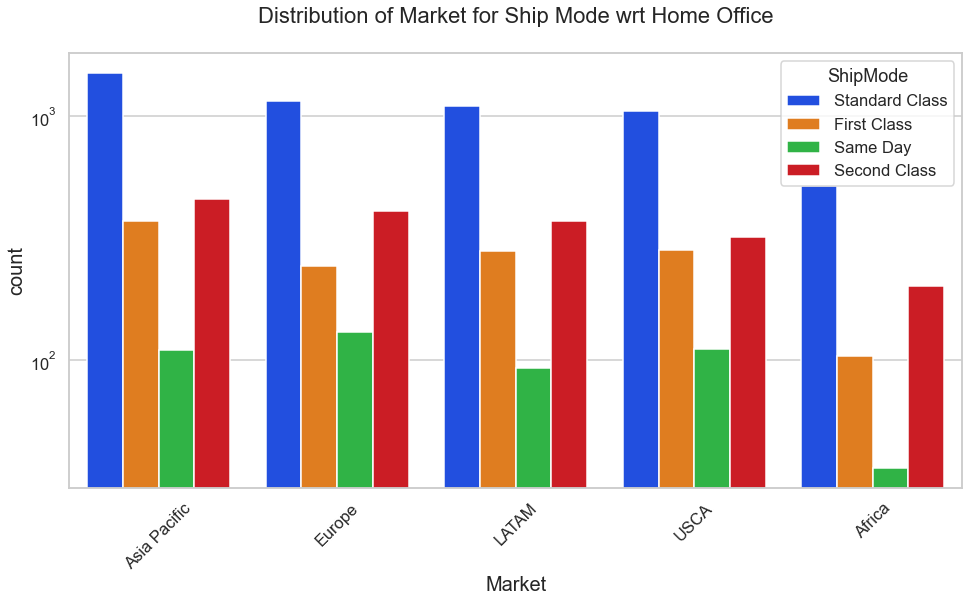

In [70]:
uniplot(new_df1_target3,col='Market',title='Distribution of Market for Ship Mode wrt Home Office',hue='ShipMode')

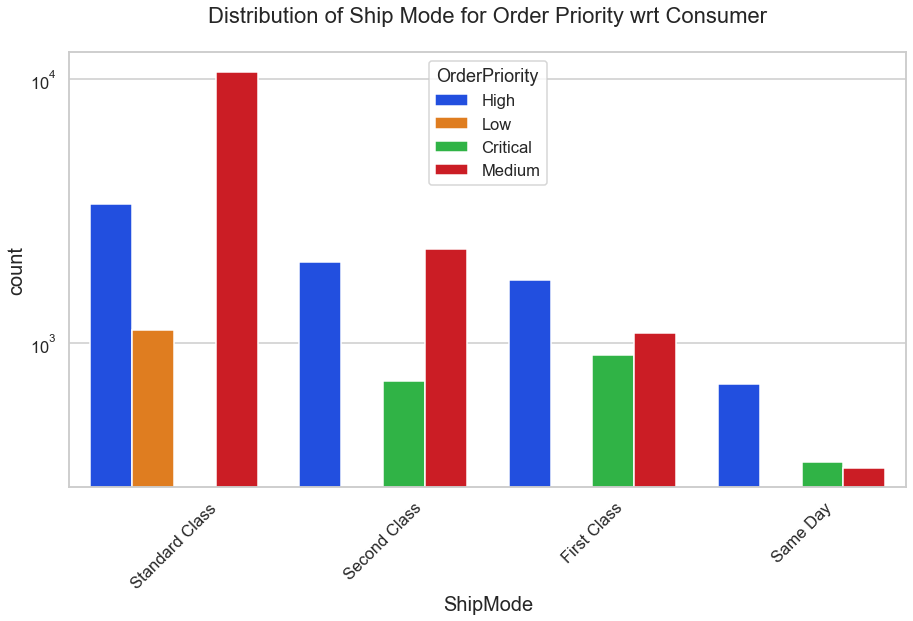

In [71]:
uniplot(new_df1_target1,col='ShipMode',title='Distribution of Ship Mode for Order Priority wrt Consumer',hue='OrderPriority')

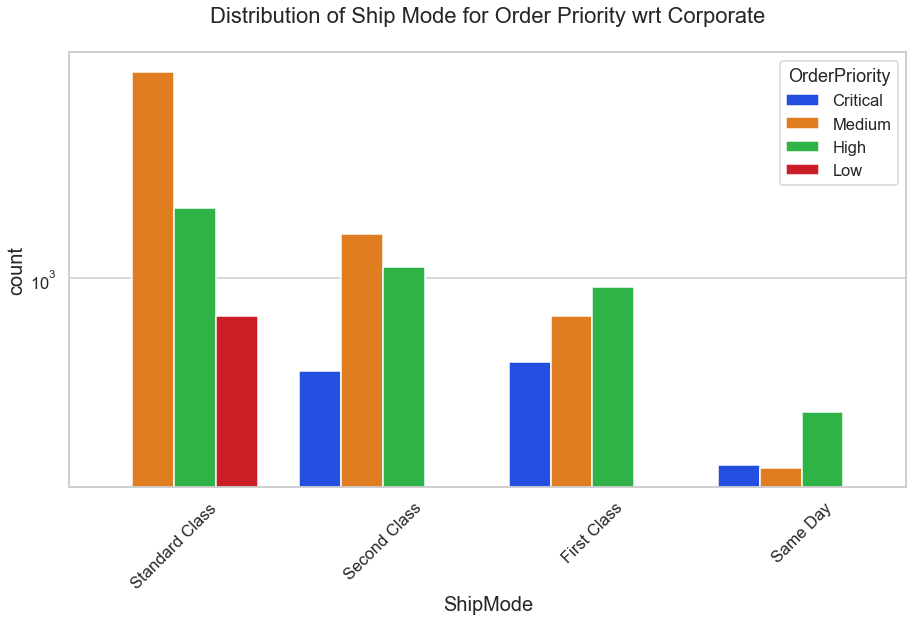

In [72]:
uniplot(new_df1_target2,col='ShipMode',title='Distribution of Ship Mode for Order Priority wrt Corporate',hue='OrderPriority')

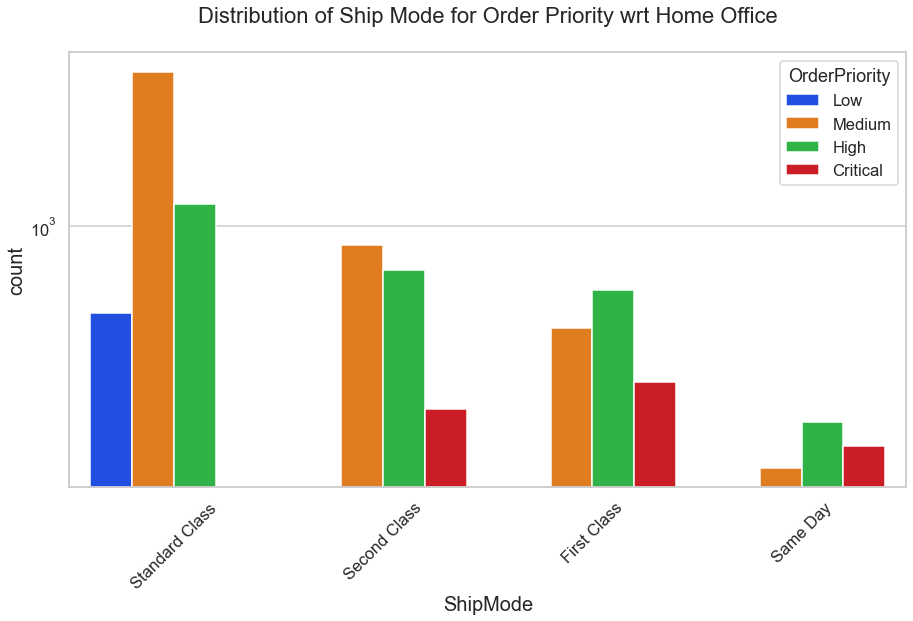

In [73]:
uniplot(new_df1_target3,col='ShipMode',title='Distribution of Ship Mode for Order Priority wrt Home Office',hue='OrderPriority')

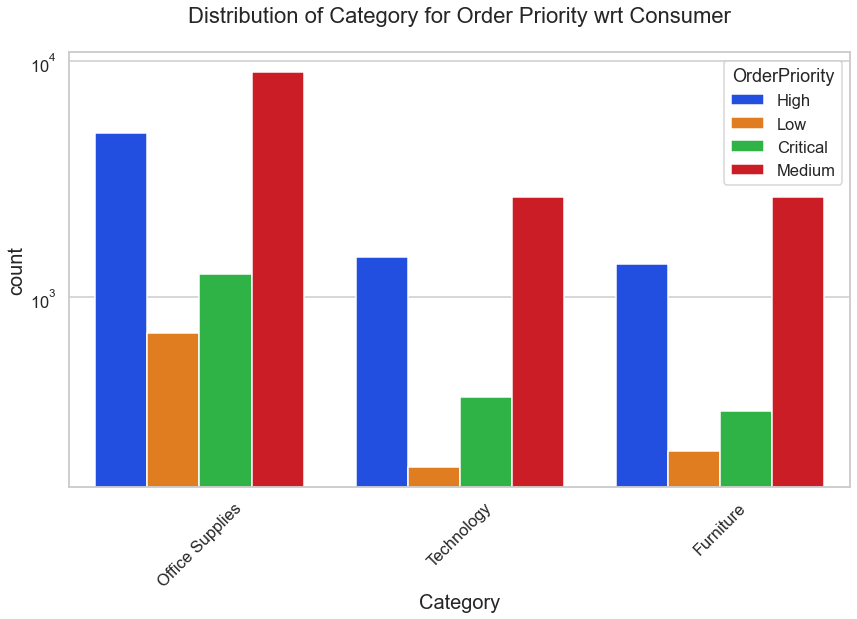

In [74]:
uniplot(new_df1_target1,col='Category',title='Distribution of Category for Order Priority wrt Consumer',hue='OrderPriority')

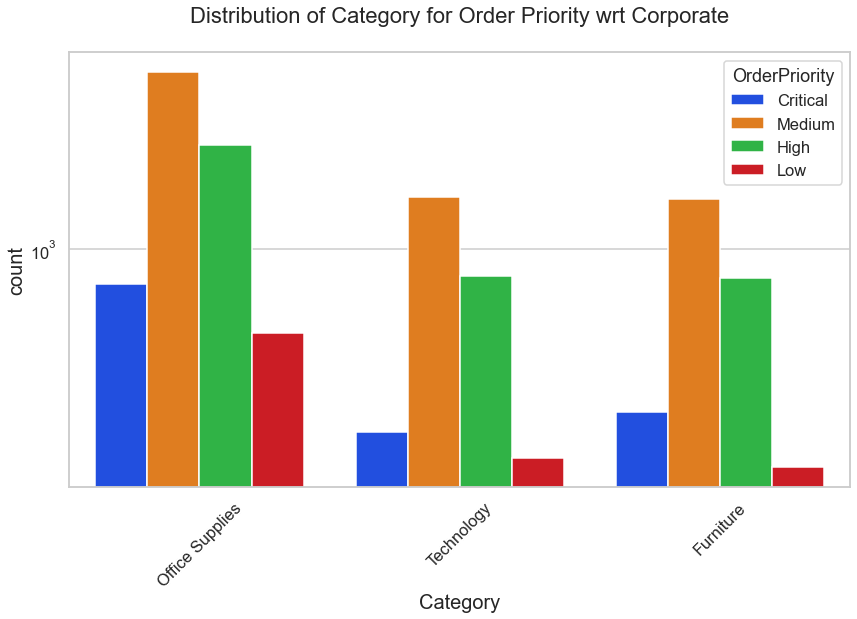

In [75]:
uniplot(new_df1_target2,col='Category',title='Distribution of Category for Order Priority wrt Corporate',hue='OrderPriority')

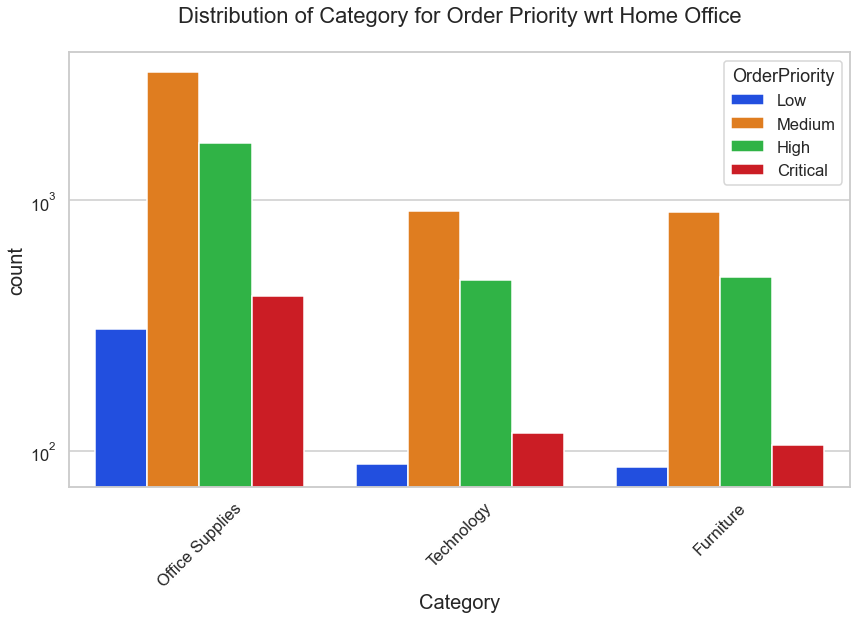

In [76]:
uniplot(new_df1_target3,col='Category',title='Distribution of Category for Order Priority wrt Home Office',hue='OrderPriority')

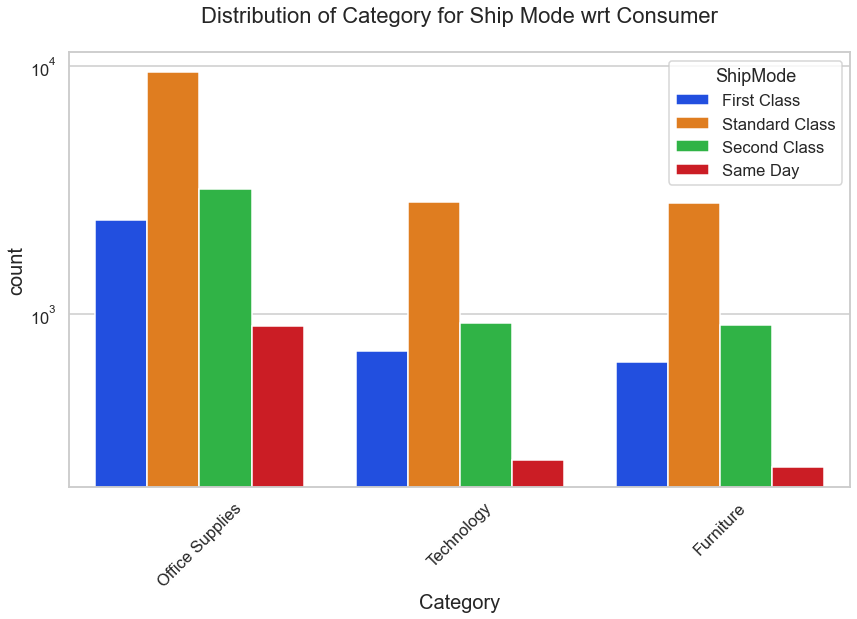

In [77]:
uniplot(new_df1_target1,col='Category',title='Distribution of Category for Ship Mode wrt Consumer',hue='ShipMode')

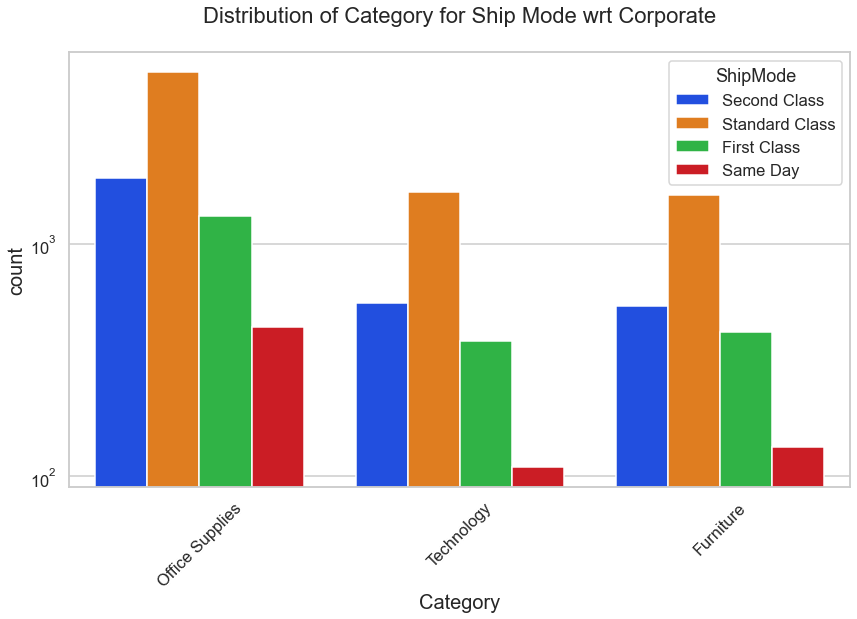

In [78]:
uniplot(new_df1_target2,col='Category',title='Distribution of Category for Ship Mode wrt Corporate',hue='ShipMode')

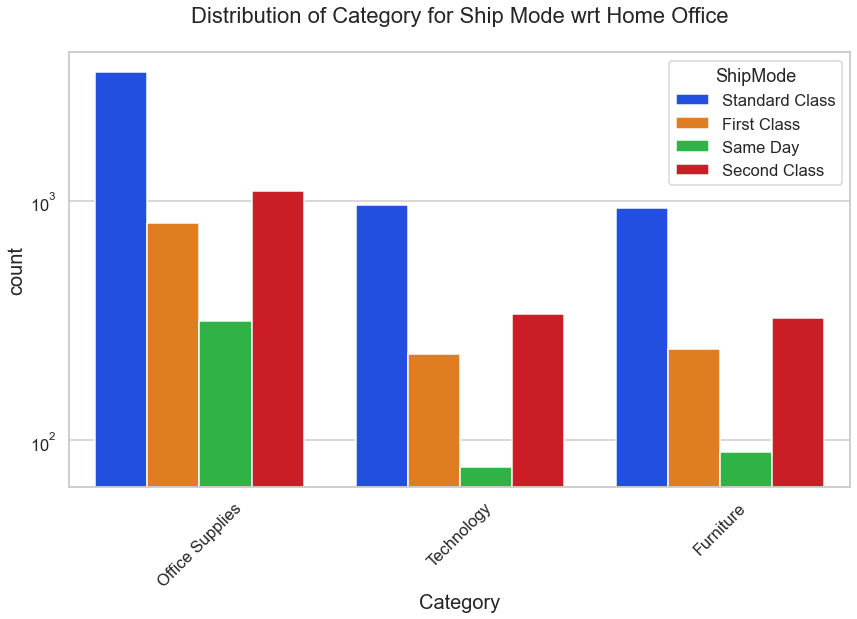

In [79]:
uniplot(new_df1_target3,col='Category',title='Distribution of Category for Ship Mode wrt Home Office',hue='ShipMode')

**Insight**

**Market vs Category wrt Consumer**\
1)
  * Office Supplies gain top in all market.\
  * More focus to be done on African market.\
  * Furniture & technology is on same sales.

**wrt Corporate**\
2)
  * Office Supplies is on top.\
  * Focus on African market\
  * Suprising insight furniture is very less compared to technology in African Market.

**wrt Home Office**\
3)
  * Office supplies is on top\
  * Furniture is less compared to technology in African market

**Market vs Order Priority wrt Consumer**\
1)
  * Medium order priority is on top\
  * Focus on high & critical order priority

**wrt Corporate**\
2)
  * Medium order priority is on top\
  * Focus on critical to make it top order priority

**wrt Home Office**\
3)
  * Medium is on top\
  * Critical is in down side.

**Market vs Ship Mode wrt Consumer**\
1)
  * Standard class shipping mode is on top\
  * Some good decisions to be made on first class to get it on top\
  * Same day should be on top.

**wrt Corporate**\
2)
  * Standard class on top\
  * Focus on same day delivery

**wrt Home Office**\
3)
  * Standard class on top\
  * Focus on same day delivery\
  * Focus on first class delivery because it's less that second class delivery

**Ship Mode vs Order Priority wrt Consumer**\
1)
  * Medium order priority gaining top\

**wrt Corporate**\
2)
  * Medium is on top\
  * Focus on critical order in first class

**wrt Home Office**\
3)
  * Medium order is on top in standard & second class\
  * High order is on top in first & same day delivery

**Category vs Order Priority wrt Consumer**\
1)  
  * Medium order is on top in all technology, furniture & office supplies category\
  * Must focus on critical order priority

**wrt Corporate**\
2)
  * Medium order is on top in all category\
  * Foucs on critical order priority

**wrt Home Office**\
3)
  * Medium is on top in all\
  * Foucs on critical order

**Category vs Ship Mode wrt Consumer**\
1)
  * Standard class is on top\
  * Must focus on same day & first class shipping mode

**wrt Corporate**\
2)
  * Standard class is on top
  * Focus on same day & first class shipping mode\
  * Should take some decision on same day delivery

**wrt Home Office**\
3)
  * Standard class is on top in all category\
  * Focus on same day & first class delivery


# CONCLUSION

These are some of the quick insights from this Data:

* Discount on product is less. As deep analysis got know max discount is 0.85$. Some extra decision must take in future to increase selles. If specific products take down into good discount then it will increase selles..

* Home office Segment sales getting decreases.

* Furniture & technology category got stuck on same sales.

* Tables, Machines & Appliances sales is worst ranges (861-1742).

* In segment, half of market is captured by consumers but Home Office Segment sales is 18%.

* Technology & Furniture sales ratio is 19:19 so less as compared to office supplies sales 61%.

* Good to know people purchasing above 10 quantity some item. Must give some special offers.

* Same day delivery having lower sales.

* Home office  sales is less in all segment.

* Asia pacific market is on top of all market.

* African market is in worst condition.

* Critical & first order priority is on down side. 



In [84]:
cmart_data.to_csv('bigmart.csv')